# Clustering Project By Yashika Mehrotra

# Idea:
You own a departmental store and you have a data of customers for which you have group/create clusters of customers.
basically try to group them to understand customers so that you can send the list /data to marketing team so that team
can prepare the strategy to send marketing offers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Load and View Data

In [3]:
df=pd.read_csv(r'C:\Users\Shilpi\Downloads\shopping_customers_dataset.csv')
df.head()

,C_ID,GENDER,AGE,INCOME,SPEND_SCORE
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#c_id== customer id -- identification number for each customer
#gender == gender of customer
#age == age of customer
# income == income present for each customers --
# spend_score == past behaviour and nature of spend of customer...


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df

,C_ID,GENDER,AGE,INCOME,SPEND_SCORE
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.rename(columns={'C_ID':'Customer_ID','GENDER':'Gender','AGE':'Age','INCOME':'Income','SPEND_SCORE':'Spending_Score'},inplace=True)


In [7]:
df.head()

,Customer_ID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


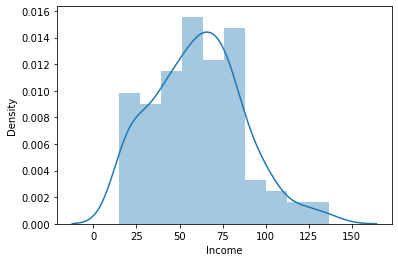

In [8]:
sns.distplot(df['Income'])
plt.show()

C:\Users\Shilpi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


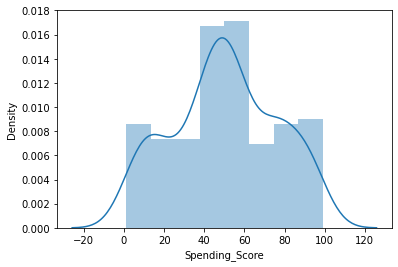

In [9]:
sns.distplot(df['Spending_Score'])
plt.show()

In [10]:
df['Income'].describe().round()

count    200.0
mean      61.0
std       26.0
min       15.0
25%       42.0
50%       62.0
75%       78.0
max      137.0
Name: Income, dtype: float64

In [11]:
df['Spending_Score'].describe().round()

count    200.0
mean      50.0
std       26.0
min        1.0
25%       35.0
50%       50.0
75%       73.0
max       99.0
Name: Spending_Score, dtype: float64

In [12]:
df['Gender'].unique()

array(['Male ', 'Female '], dtype=object)

In [13]:
genderdf=df['Gender'].value_counts().reset_index()
genderdf

,index,Gender
0,Female,112
1,Male,88


In [14]:
genderdf.rename(columns={'index':'Gender','Gender':'Count'},inplace=True)

In [15]:
genderdf

,Gender,Count
0,Female,112
1,Male,88


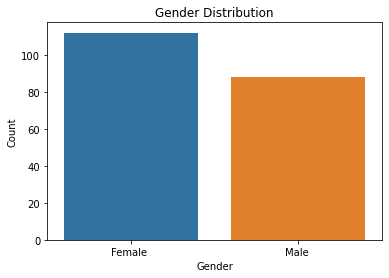

In [16]:
sns.barplot(x='Gender',y='Count',data=genderdf)
plt.title('Gender Distribution')
plt.show()

In [17]:
df.head()

,Customer_ID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
#clustering using 2 features -- 'Income' & 'Spending_Score'

In [19]:
x=df[['Income','Spending_Score']]
x.head()

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
#import KMeans
from sklearn.cluster import KMeans

In [21]:
df.tail()

,Customer_ID,Gender,Age,Income,Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [22]:
df.shape

(200, 5)

In [23]:
#calculating the nbr of clusters to be created

In [24]:
start=[]

clusters_range=[1,2,3,4,5,6,7,8,9,10]

for i in clusters_range:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    start.append(kmeans.inertia_)
    

C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


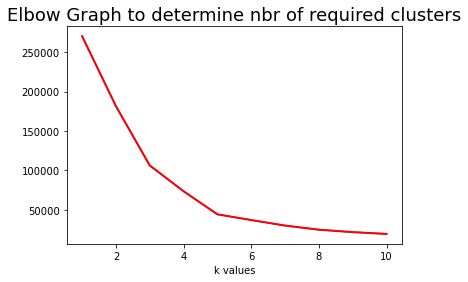

In [25]:
plt.plot(clusters_range,start)
plt.plot(clusters_range,start,linewidth=2,color='red')

plt.xlabel('k values')
plt.title('Elbow Graph to determine nbr of required clusters',fontsize=18)
plt.show()

In [26]:
#nbr of required clusters to be -- 5


In [27]:
kmeans_fit=KMeans(n_clusters=5)
kmeans_fit=kmeans_fit.fit(x)
kmeans_fit

KMeans(n_clusters=5)

In [28]:
y=kmeans_fit.predict(x)
y

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [29]:
df.head()

,Customer_ID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df['Age'].dtype

dtype('int64')

In [35]:
df['Income'].dtype

dtype('int64')

In [36]:
df['Spending_Score'].dtype

dtype('int64')

In [30]:
df['label']=y

df.head()

,Customer_ID,Gender,Age,Income,Spending_Score,label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


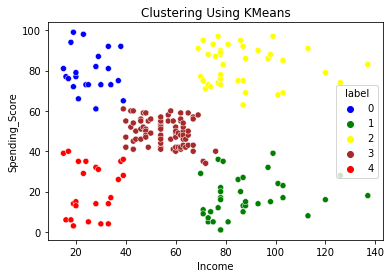

In [31]:
sns.scatterplot(x='Income',y='Spending_Score',hue='label',data=df,
               palette=['blue','green','yellow','brown','red'])

plt.title('Clustering Using KMeans')
plt.show()

In [32]:
#0-- label -- high income low spend
#1--- label -- low income high spend
#2-- label-- high income high spend
#3-- label-- usual customers
#4--label --low income low spending 
